# Data Preprocessing

## Attributes Discretization

In [1]:
from sklearn import datasets
from amltlearn.preprocessing import Discretizer
from pylab import *
%matplotlib inline

We will work with the well known iris dataset, that is included among the scikit-learn datasets

In [2]:
iris = datasets.load_iris()
col = ['Set', 'Ver', 'Vir']
lc = [col[i] for i in iris['target']]

This is a plot of two of the attributes of the dataset 

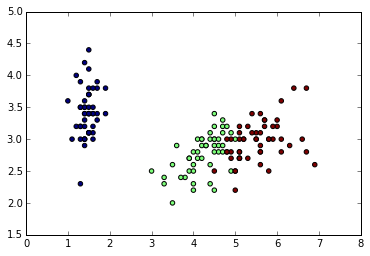

In [3]:
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=iris['target'])

Now we discretize the attributes using equal bins (5 in this examples), the plot represents the 5x5 possible combinations, one combination can have many data points

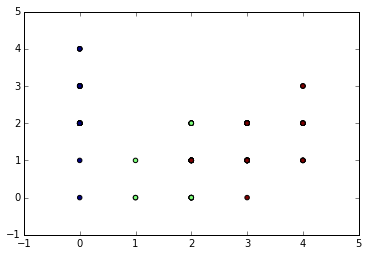

In [4]:
disc = Discretizer(bins=5, method='equal')
disc.fit(iris['data'])
irisdisc = disc.transform(iris['data'], copy=True)
plt.scatter(irisdisc[:, 2], irisdisc[:, 1], c=iris['target'])

Using frequency distretization obtains also a 5x5 grid of combinations but the distribution of the data points changes

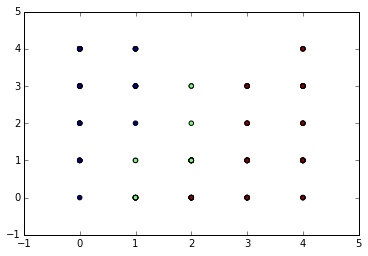

In [5]:
disc = Discretizer(bins=5, method='frequency')
disc.fit(iris['data'])
irisdisc = disc.transform(iris['data'], copy=True)
plt.scatter(irisdisc[:, 2], irisdisc[:, 1], c=iris['target'])

## Data normalization

Data normalization standardizes the attributes so their scales do not influence the comparisons, first we will use a range normalization for the iris dataset, the only difference that we can observe in the plot is the change of scale (plots already scale the ranges of the attributes to maintain a 1:1 proportion)

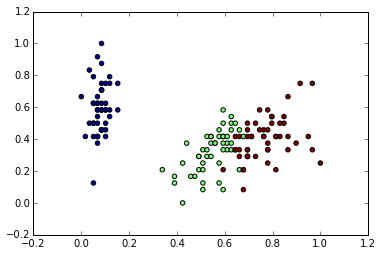

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mx = MinMaxScaler()
fdata = mx.fit_transform(iris['data'])
plt.scatter(fdata[:, 2], fdata[:, 1], c=iris['target'])

We can now use a standard score normalization assuming gaussian data, as before the only change that we can observe is the change in the scale of the axis of the plot

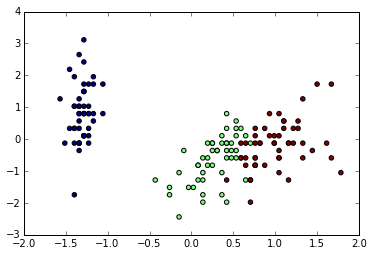

In [7]:
std = StandardScaler()
fdata = std.fit_transform(iris['data'])
plt.scatter(fdata[:, 2], fdata[:, 1], c=iris['target'])

## Dimensionality Reduction

We will apply different dimensionality reduction methods to the iris dataset

We will start with PCA, that finds a new space where the new dimensions are orthogonal preserving the variance of the data

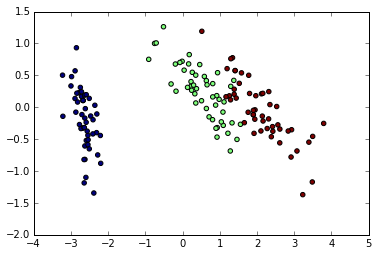

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
fdata = pca.fit_transform(iris['data'])
plt.scatter(fdata[:, 0], fdata[:, 1], c=iris['target'])

Looking at the variance explained by each component, we can see that the first one has most of the variance and the two first components explains almost 98%, so only this components would be necessary. 

In [9]:
print pca.explained_variance_ratio_

[ 0.92461621  0.05301557  0.01718514  0.00518309]


The relationships among the data can be explained using linear transformations, but we can observe if non linear transformations can improve se separability of the patters. First we will try KernelPCA using a RBF kernel. 

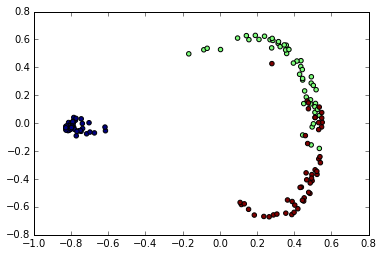

In [10]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf')
fdata = kpca.fit_transform(iris['data'])
plt.scatter(fdata[:, 0], fdata[:, 1], c=iris['target'])

As you can see the clusters get mopre elongated, but separability does not change.

We can test other transformations like ISOMAP

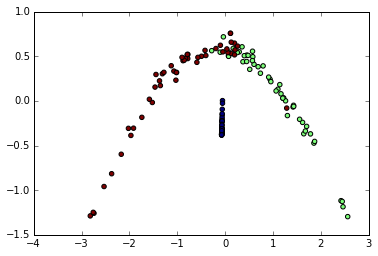

In [11]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2, n_neighbors=10)
fdata = iso.fit_transform(iris['data'])
plt.scatter(fdata[:, 0], fdata[:, 1], c=iris['target'])

Obtaining a similar results as KernelPCA in terms of separability.